## Importing Time Series Data

In [4]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/ethereum_2015-08-07_2023-12-05.csv",
                parse_dates=["Start"],
                index_col=["Start"])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2023-12-04,2023-12-05,183249.564730,189502.633299,183249.564730,187354.501458,1.496127e+12,2.240629e+13
2023-12-03,2023-12-04,180736.681743,184476.517107,179655.945019,182994.273116,1.077797e+12,2.174165e+13
2023-12-02,2023-12-03,174400.561682,181589.827360,174370.759871,180805.974704,9.173542e+11,2.123225e+13
2023-12-01,2023-12-02,171469.436050,176090.601173,171066.427852,174119.762586,1.057396e+12,2.098123e+13
2023-11-30,2023-12-01,169616.712362,171743.480958,169146.320719,171743.480958,8.574300e+11,2.047805e+13


In [80]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
eth_price = []
with open("/content/ethereum_2015-08-07_2023-12-05.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    eth_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], eth_price[:10]

([datetime.datetime(2023, 12, 5, 0, 0),
  datetime.datetime(2023, 12, 4, 0, 0),
  datetime.datetime(2023, 12, 3, 0, 0),
  datetime.datetime(2023, 12, 2, 0, 0),
  datetime.datetime(2023, 12, 1, 0, 0),
  datetime.datetime(2023, 11, 30, 0, 0),
  datetime.datetime(2023, 11, 29, 0, 0),
  datetime.datetime(2023, 11, 28, 0, 0),
  datetime.datetime(2023, 11, 27, 0, 0),
  datetime.datetime(2023, 11, 26, 0, 0)],
 [183249.56473013273,
  180736.6817426805,
  174400.56168157593,
  171469.43605035124,
  169616.71236166425,
  171303.28303548202,
  169361.13723842116,
  172231.71699787205,
  174483.8883441067,
  173759.90614180797])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3041 entries, 2023-12-04 to 2015-08-08
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         3041 non-null   object 
 1   Open        3041 non-null   float64
 2   High        3041 non-null   float64
 3   Low         3041 non-null   float64
 4   Close       3041 non-null   float64
 5   Volume      3041 non-null   float64
 6   Market Cap  3041 non-null   float64
dtypes: float64(6), object(1)
memory usage: 190.1+ KB


In [6]:
# Extracting closing price for each day
ethereum_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
ethereum_prices.head()

,Price
Start,
2023-12-04,187354.501458
2023-12-03,182994.273116
2023-12-02,180805.974704
2023-12-01,174119.762586
2023-11-30,171743.480958


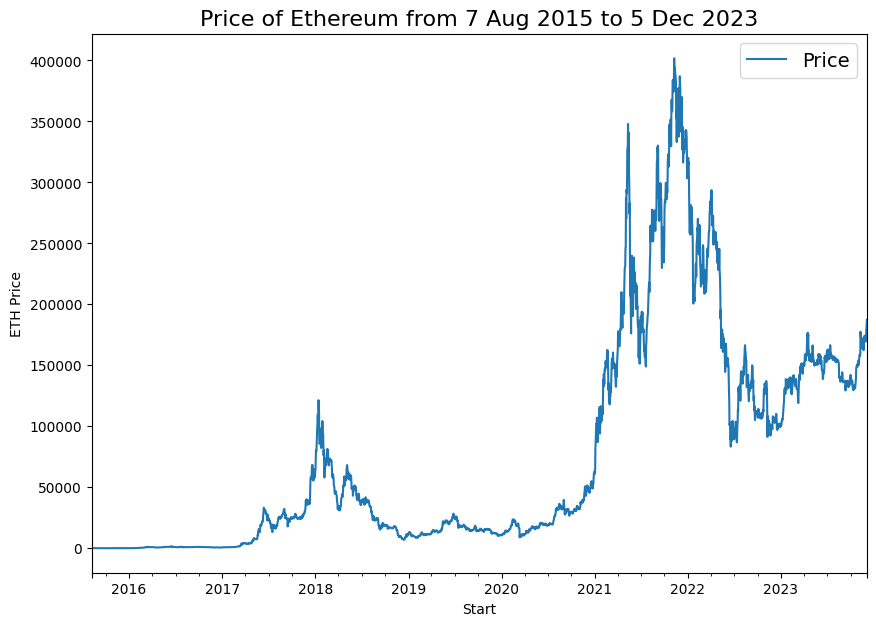

In [7]:

import matplotlib.pyplot as plt
ethereum_prices.plot(figsize=(10, 7))
plt.ylabel("ETH Price")
plt.title("Price of Ethereum from 7 Aug 2015 to 5 Dec 2023", fontsize=16)
plt.legend(fontsize=14);

In [8]:
# Get ethereum date array
timesteps = ethereum_prices.index.to_numpy()
prices = ethereum_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2023-12-04T00:00:00.000000000', '2023-12-03T00:00:00.000000000',
        '2023-12-02T00:00:00.000000000', '2023-12-01T00:00:00.000000000',
        '2023-11-30T00:00:00.000000000', '2023-11-29T00:00:00.000000000',
        '2023-11-28T00:00:00.000000000', '2023-11-27T00:00:00.000000000',
        '2023-11-26T00:00:00.000000000', '2023-11-25T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([187354.50145757, 182994.273116  , 180805.97470432, 174119.76258614,
        171743.48095819, 169680.63532724, 171247.42340251, 169595.80773413,
        172393.50897556, 174358.70239549]))

In [15]:

# Create train and test splits the right way for time series data
split_size = int(0.2 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[split_size:], prices[split_size:]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[:split_size], prices[:split_size]

len(X_train), len(X_test), len(y_train), len(y_test)

(2433, 608, 2433, 608)

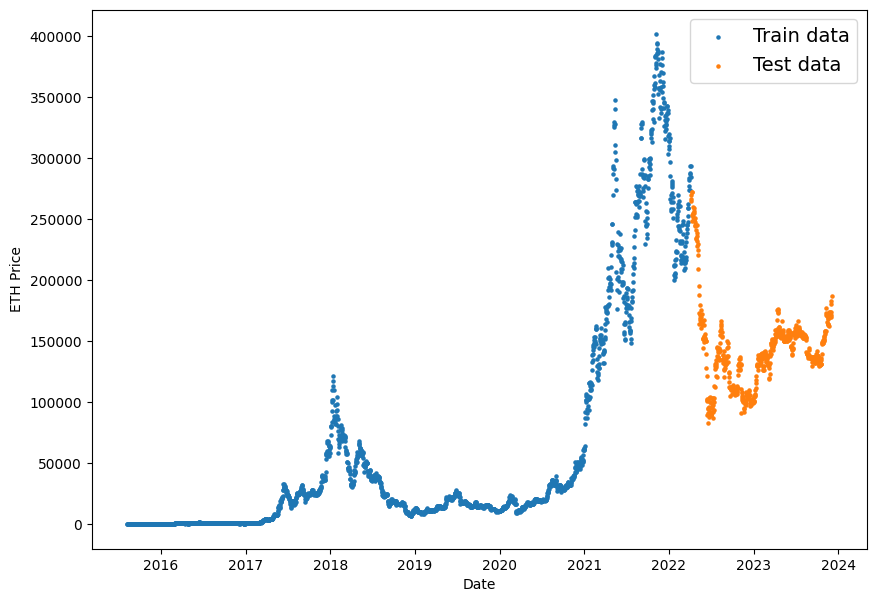

In [17]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("ETH Price")
plt.legend(fontsize=14)
plt.show();

In [20]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("ETH Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

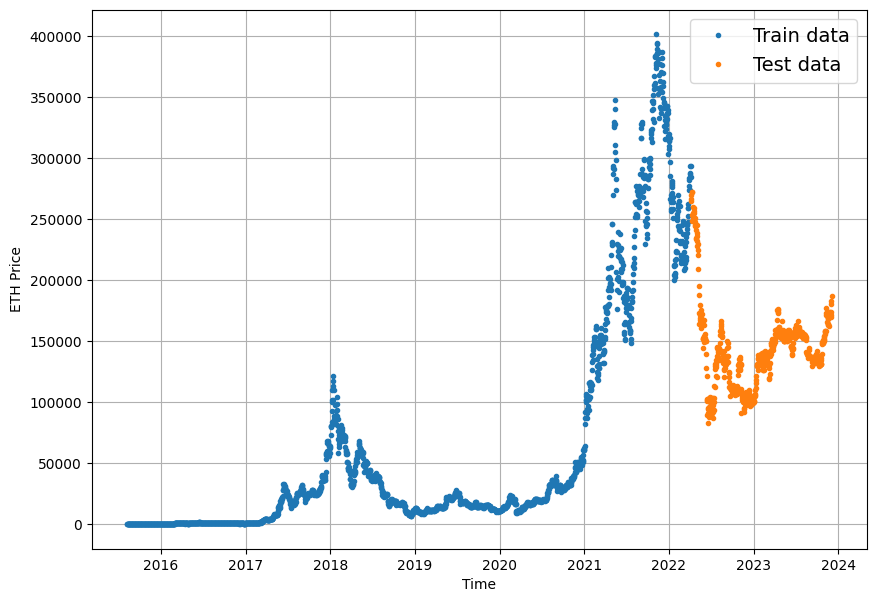

In [21]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


In [29]:
# import tensorflow and numpy
import tensorflow as tf
import numpy as np

In [23]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [105]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [25]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horiz

In [26]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [27]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [31]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3034, 3034)

In [32]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [187354.50145757 182994.273116   180805.97470432 174119.76258614
 171743.48095819 169680.63532724 171247.42340251] -> Label: [169595.80773413]
Window: [182994.273116   180805.97470432 174119.76258614 171743.48095819
 169680.63532724 171247.42340251 169595.80773413] -> Label: [172393.50897556]
Window: [180805.97470432 174119.76258614 171743.48095819 169680.63532724
 171247.42340251 169595.80773413 172393.50897556] -> Label: [174358.70239549]


## Create Training and Test splits

In [33]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2427, 607, 2427, 607)

In [35]:
train_windows[:5], train_labels[:5]

(array([[187354.50145757, 182994.273116  , 180805.97470432,
         174119.76258614, 171743.48095819, 169680.63532724,
         171247.42340251],
        [182994.273116  , 180805.97470432, 174119.76258614,
         171743.48095819, 169680.63532724, 171247.42340251,
         169595.80773413],
        [180805.97470432, 174119.76258614, 171743.48095819,
         169680.63532724, 171247.42340251, 169595.80773413,
         172393.50897556],
        [174119.76258614, 171743.48095819, 169680.63532724,
         171247.42340251, 169595.80773413, 172393.50897556,
         174358.70239549],
        [171743.48095819, 169680.63532724, 171247.42340251,
         169595.80773413, 172393.50897556, 174358.70239549,
         173700.5776915 ]]),
 array([[169595.80773413],
        [172393.50897556],
        [174358.70239549],
        [173700.5776915 ],
        [172224.45416158]]))

## Creating a Modelling checkpoint

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) #

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

## Create a Naive Forecast

In [38]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([187354.50145757, 182994.273116  , 180805.97470432, 174119.76258614,
        171743.48095819, 169680.63532724, 171247.42340251, 169595.80773413,
        172393.50897556, 174358.70239549]),
 array([255511.05852295, 254093.61304008, 252298.7196336 , 260509.31577578,
        253662.88865267, 249030.56510592, 272506.53194891, 272373.26136509,
        266584.24056248, 270049.88871274]))

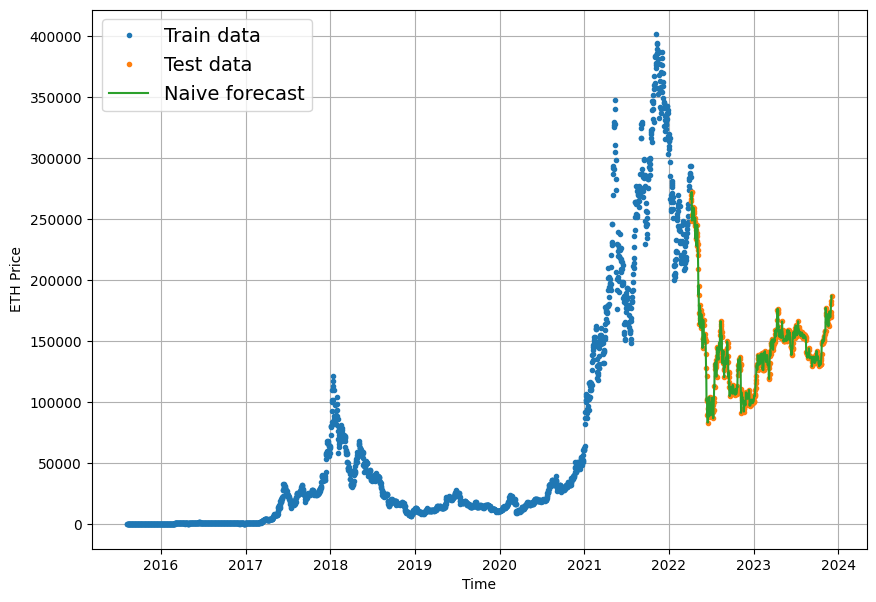

In [40]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


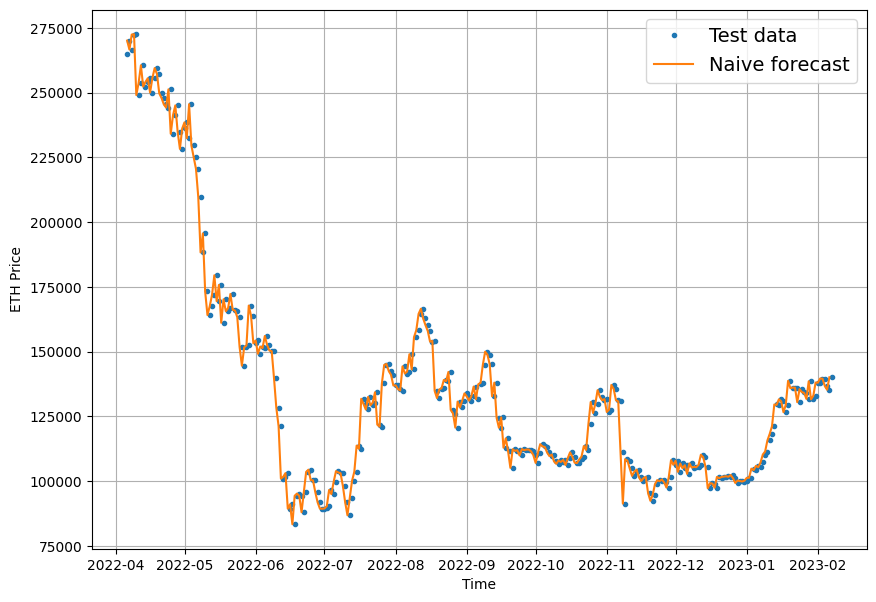

In [41]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


## Model 1

In [93]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
19/19 [==============================] - 2s 57ms/step - loss: 14247.2637 - mae: 14247.2637 - val_loss: 79.8240 - val_mae: 79.8240
Epoch 2/100
19/19 [==============================] - 0s 24ms/step - loss: 5811.0659 - mae: 5811.0659 - val_loss: 64.0080 - val_mae: 64.0080
Epoch 3/100
19/19 [==============================] - 1s 34ms/step - loss: 4556.1304 - mae: 4556.1304 - val_loss: 58.0393 - val_mae: 58.0393
Epoch 4/100
19/19 [==============================] - 1s 35ms/step - loss: 4143.4473 - mae: 4143.4473 - val_loss: 53.6839 - val_mae: 53.6839
Epoch 5/100
19/19 [==============================] - 1s 33ms/step - loss: 3962.7722 - mae: 3962.7722 - val_loss: 51.7233 - val_mae: 51.7233
Epoch 6/100
19/19 [==============================] - 1s 33ms/step - loss: 3771.1736 - mae: 3771.1736 - val_loss: 49.4437 - val_mae: 49.4437
Epoch 7/100
19/19 [==============================] - 1s 33ms/step - loss: 3717.5381 - mae: 3717.5381 - val_loss: 48.2368 - val_mae: 48.2368
Epoch 8/100
19/19 

## Creating an ensemble

In [46]:
# Add windowed columns
ethereum_prices_nbeats = ethereum_prices.copy()
for i in range(WINDOW_SIZE):
  ethereum_prices_nbeats[f"Price+{i+1}"] = ethereum_prices_nbeats["Price"].shift(periods=i+1)
ethereum_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,
2023-11-27,169595.807734,171247.423403,169680.635327,171743.480958,174119.762586,180805.974704,182994.273116,187354.501458
2023-11-26,172393.508976,169595.807734,171247.423403,169680.635327,171743.480958,174119.762586,180805.974704,182994.273116
2023-11-25,174358.702395,172393.508976,169595.807734,171247.423403,169680.635327,171743.480958,174119.762586,180805.974704
2023-11-24,173700.577692,174358.702395,172393.508976,169595.807734,171247.423403,169680.635327,171743.480958,174119.762586
2023-11-23,172224.454162,173700.577692,174358.702395,172393.508976,169595.807734,171247.423403,169680.635327,171743.480958


In [47]:
# Make features and labels
X = ethereum_prices_nbeats.dropna().drop("Price", axis=1)
y = ethereum_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2427, 2427, 607, 607)

In [48]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Constructing and fitting an ensemble of models (using different loss functions)

In [43]:
import keras.layers as layers

In [49]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])
       # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [50]:

%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 114: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 362: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 462: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 194: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 294: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 688: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 196: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 296: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

## Making predictions with an ensemble model

In [51]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [52]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 72ms/step


<tf.Tensor: shape=(15, 607), dtype=float32, numpy=
array([[3540.7275  , 3744.3333  , 3705.6382  , ...,   85.69333 ,
          58.316696,   55.08957 ],
       [3512.057   , 3717.0674  , 3740.4077  , ...,   86.91162 ,
          77.80718 ,   81.68841 ],
       [3567.404   , 3750.4548  , 3751.3284  , ...,  129.43037 ,
          58.62909 ,   56.479187],
       ...,
       [3612.0432  , 3795.0864  , 3761.043   , ...,  107.382385,
          70.84508 ,   61.347538],
       [3538.1008  , 3692.0037  , 3675.2078  , ...,  111.21127 ,
          67.39897 ,   68.243355],
       [3580.1235  , 3798.6794  , 3758.0605  , ...,   97.97833 ,
          70.93947 ,   59.71097 ]], dtype=float32)>

In [53]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 39.7623,
 'mse': 10227.145,
 'rmse': 101.12935,
 'mape': 5.1643844,
 'mase': 1.053293}

## Plotting the prediction intervals

In [54]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

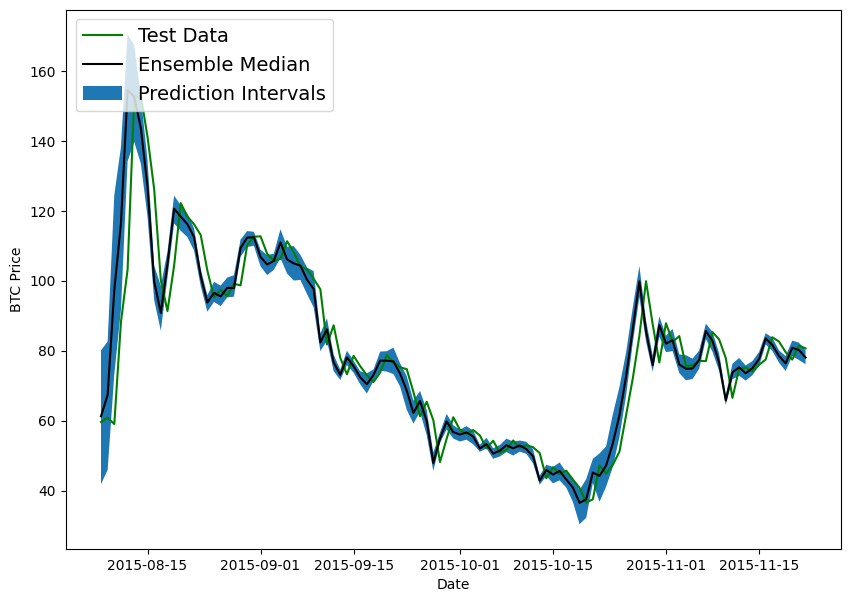

In [55]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## block reward based Model

In [56]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [59]:
# Block reward values
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2015-12-28")
block_reward_3_datetime = np.datetime64("2018-07-09")
block_reward_4_datetime = np.datetime64("2022-05-11")

In [60]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - ethereum_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - ethereum_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(-1974, -572)

In [61]:
# Add block_reward column
ethereum_prices_block = ethereum_prices.copy()
ethereum_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
ethereum_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
ethereum_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
ethereum_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
ethereum_prices_block.head()

,Price,block_reward
Start,,
2023-12-04,187354.501458,25
2023-12-03,182994.273116,25
2023-12-02,180805.974704,25
2023-12-01,174119.762586,25
2023-11-30,171743.480958,25


In [62]:
# Make a copy of the Bitcoin historical data with block reward feature
ethereum_prices_windowed = ethereum_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  ethereum_prices_windowed[f"Price+{i+1}"] = ethereum_prices_windowed["Price"].shift(periods=i+1)
ethereum_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Start,,,,,,,,,
2023-12-04,187354.501458,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-03,182994.273116,25,187354.501458,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-02,180805.974704,25,182994.273116,187354.501458,NaN,NaN,NaN,NaN,NaN
2023-12-01,174119.762586,25,180805.974704,182994.273116,187354.501458,NaN,NaN,NaN,NaN
2023-11-30,171743.480958,25,174119.762586,180805.974704,182994.273116,187354.501458,NaN,NaN,NaN
2023-11-29,169680.635327,25,171743.480958,174119.762586,180805.974704,182994.273116,187354.501458,NaN,NaN
2023-11-28,171247.423403,25,169680.635327,171743.480958,174119.762586,180805.974704,182994.273116,187354.501458,NaN
2023-11-27,169595.807734,25,171247.423403,169680.635327,171743.480958,174119.762586,180805.974704,182994.273116,187354.501458
2023-11-26,172393.508976,25,169595.807734,171247.423403,169680.635327,171743.480958,174119.762586,180805.974704,182994.273116


In [64]:
# Train model on entire data to make prediction for the next day
X_all = ethereum_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = ethereum_prices_windowed.dropna()["Price"].to_numpy()


In [65]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [66]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_01 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_01.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_01.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all b

### Make predictions into the future

In [67]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

In [68]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [70]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_01,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 120ms/step
Predicting on: 
 [152.78722808 152.44368175 103.20315262  88.19384685  59.01183734
  60.81662297  59.60995817] -> Prediction: 139.59805297851562

1/1 [==============================] - 0s 72ms/step
Predicting on: 
 [152.44368175 103.20315262  88.19384685  59.01183734  60.81662297
  59.60995817 139.59805298] -> Prediction: 114.99250030517578

1/1 [==============================] - 0s 49ms/step
Predicting on: 
 [103.20315262  88.19384685  59.01183734  60.81662297  59.60995817
 139.59805298 114.99250031] -> Prediction: 95.28826904296875

1/1 [==============================] - 0s 66ms/step
Predicting on: 
 [ 88.19384685  59.01183734  60.81662297  59.60995817 139.59805298
 114.99250031  95.28826904] -> Prediction: 84.34786987304688

1/1 [==============================] - 0s 33ms/step
Predicting on: 
 [ 59.01183734  60.81662297  59.60995817 139.59805298 114.99250031
  95.28826904  84.34786987] -> Prediction: 65.82774353027344

1/1 [=======

In [71]:
future_forecast[:10]

[139.59805,
 114.9925,
 95.28827,
 84.34787,
 65.82774,
 72.79558,
 86.922,
 123.94131,
 99.23313,
 91.635124]

In [72]:

def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [73]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = ethereum_prices.index[-1]
last_timestep

Timestamp('2015-08-08 00:00:00')

In [74]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
       '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
       '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
       '2015-08-21', '2015-08-22'], dtype='datetime64[D]')

In [81]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, eth_price[-1])
next_time_steps, future_forecast

(array(['2015-08-08', '2015-08-08', '2015-08-08', '2015-08-08',
        '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
        '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
        '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
        '2015-08-21', '2015-08-22'], dtype='datetime64[D]'),
 array([231.15332 , 139.59805 , 114.9925  ,  95.28827 ,  84.34787 ,
         65.82774 ,  72.79558 ,  86.922   , 123.94131 ,  99.23313 ,
         91.635124,  80.606834,  70.93128 ,  82.29838 ,  95.591995],
       dtype=float32))

## Final model

In [85]:
# Let's introduce a Turkey problem to our ETH data (price ETH falls 100x in one day)
eth_price_turkey = eth_price.copy()
eth_price_turkey[-1] = eth_price_turkey[-1] / 100

In [86]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
eth_price_turkey[-10:]

[130.58346174628272,
 140.82898063466018,
 152.41699853909427,
 152.40032153268362,
 101.51627342285552,
 89.04354032833692,
 59.07395918802992,
 58.527703843049366,
 62.81602927148166,
 2.3115331505533434]

In [87]:
# Get the timesteps for the turkey problem
eth_timesteps_turkey = np.array(ethereum_prices.index)
eth_timesteps_turkey[-10:]

array(['2015-08-17T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-08-15T00:00:00.000000000', '2015-08-14T00:00:00.000000000',
       '2015-08-13T00:00:00.000000000', '2015-08-12T00:00:00.000000000',
       '2015-08-11T00:00:00.000000000', '2015-08-10T00:00:00.000000000',
       '2015-08-09T00:00:00.000000000', '2015-08-08T00:00:00.000000000'],
      dtype='datetime64[ns]')

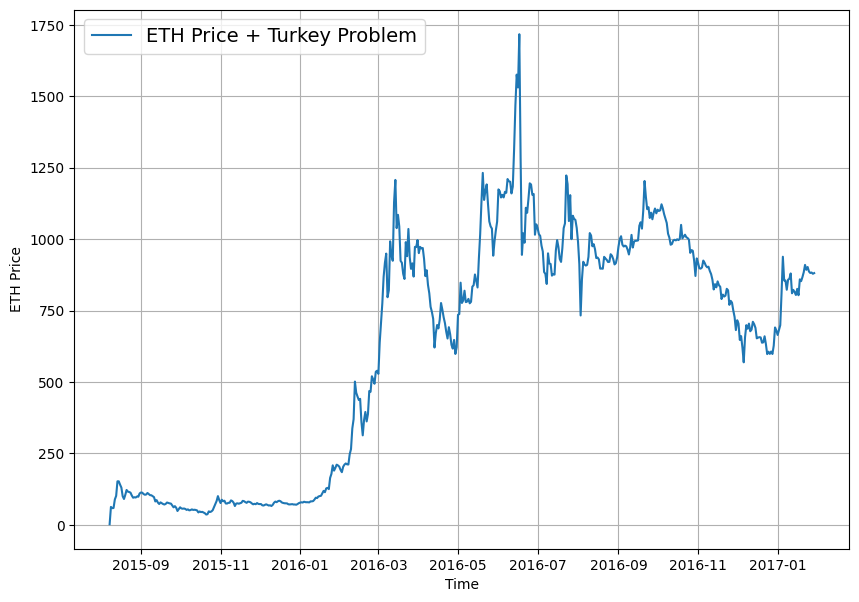

In [89]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=eth_timesteps_turkey,
                 values=eth_price_turkey,
                 format="-",
                 label="ETH Price + Turkey Problem",
                 start=2500)

In [91]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(eth_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2427, 607, 2427, 607)

### Building a turkey model

In [94]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [95]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 38.8187


38.818687438964844

In [96]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 38.5910


38.59095001220703

In [97]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

19/19 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3751.1597, 3739.9175, 3699.2825, 4021.4778, 4231.2812, 4201.6704,
       4334.68  , 4435.3506, 4275.4727, 4145.9707], dtype=float32)>

In [99]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)

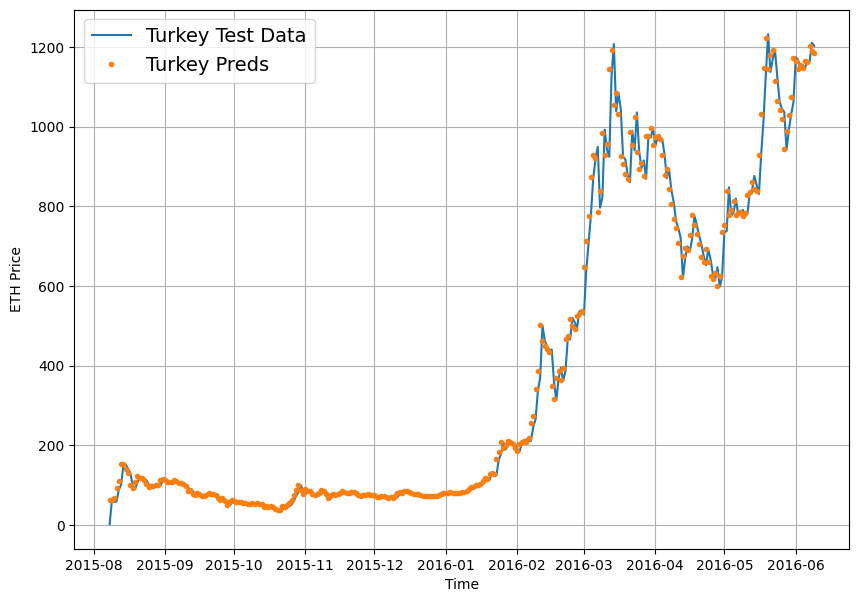

In [100]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=eth_timesteps_turkey[-len(X_test):],
                 values=eth_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=eth_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

In [106]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': array([138797.58, 138431.31, 138268.66, 138323.88, 138143.05, 138066.31,
        138262.36, 138351.11, 138283.48, 138222.75, 138067.86, 138854.1 ,
        138965.52, 138898.56, 138878.12, 138765.58, 139647.78, 138591.47,
        138631.67, 139573.1 , 140106.86, 140112.02, 140541.86, 140705.73,
        140884.19, 141015.75, 141107.75, 140921.2 , 140861.39, 140886.69,
        140943.69, 140873.64, 140909.39, 141049.52, 141177.31, 141212.39,
        141285.48, 141366.45, 141406.44, 141402.25, 141445.6 , 141439.88,
        141459.75, 141432.36, 141428.05, 141439.2 , 141420.25, 141418.9 ,
        141410.12, 141556.5 , 141545.7 , 141549.86, 141555.75, 141576.3 ,
        141543.03, 141536.02, 141546.52, 141549.55, 141542.86, 141569.44,
        141593.89, 141601.33, 141601.72, 141614.75, 141622.02, 141615.27,
        141617.56, 141613.27, 141614.8 , 141609.62, 141593.94, 141603.75,
        141586.56, 141612.28, 141629.27, 141643.39, 141637.17, 141692.67,
        141670.36, 141691.83, 1

In [111]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({
                            "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
model_9_ensemble,39.762299,10227.144531,101.129349,5.164384,1.053293
model_10_turkey,"[2958.5837, 2935.9219, 3289.1038, 3447.4153, 3...","[9201074.0, 9061643.0, 11332160.0, 12426629.0,...","[3033.3271, 3010.2563, 3366.3274, 3525.1423, 3...","[79.47913, 79.37798, 80.91451, 81.545845, 81.3...",17.887007


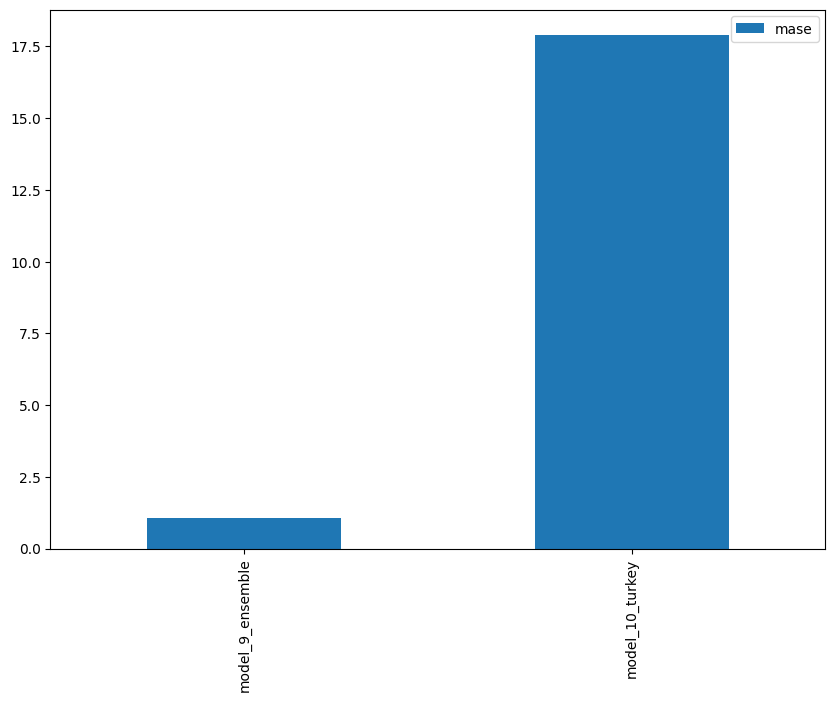

In [112]:
# Sort model results by MAE and plot them
model_results[["mase"]].sort_values(by="mase").plot(figsize=(10, 7), kind="bar");